# Question 3
Identify Relationship between Building Characteristics and Top Complaint Type


##Import the PLUTO data and clean up:
- Drop null over 5% 
- Drop un-needed objects (especially with large nunique)
- Drop irrelevant building data
- Concat df and see what has the greatest p value 

# Imports + Options

In [88]:
# Normal data analysis packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 40

pd.set_option('chained_assignment',None)

sns.set_style('whitegrid')

# Data

## Data Import

In [90]:
dfPLUTO_bx = pd.read_csv('BX_18v1.csv')

In [91]:
dfPLUTO_bx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Borough               89854 non-null  object 
 1   Block                 89854 non-null  int64  
 2   Lot                   89854 non-null  int64  
 3   CD                    89854 non-null  int64  
 4   CT2010                89447 non-null  float64
 5   CB2010                87342 non-null  float64
 6   SchoolDist            89695 non-null  float64
 7   Council               89649 non-null  float64
 8   ZipCode               89525 non-null  float64
 9   FireComp              89568 non-null  object 
 10  PolicePrct            89692 non-null  float64
 11  HealthCenterDistrict  89727 non-null  float64
 12  HealthArea            89630 non-null  float64
 13  SanitBoro             89235 non-null  float64
 14  SanitDistrict         89238 non-null  float64
 15  SanitSub           

In [92]:
df311_heat = pd.read_pickle('df311_heat.pkl')

In [93]:
df311_heat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149424 entries, 0 to 6019841
Data columns (total 18 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Unique Key                 int64         
 1   Created Date               object        
 2   Closed Date                object        
 3   Number of Heat Complaints  object        
 4   Location Type              object        
 5   Incident Zip               float64       
 6   Incident Address           object        
 7   Street Name                object        
 8   Address Type               object        
 9   City                       object        
 10  Status                     object        
 11  Resolution Description     object        
 12  Borough                    object        
 13  Latitude                   float64       
 14  Longitude                  float64       
 15  Created DateTime           datetime64[ns]
 16  Year                       int64    

## Data Cleaning

### Cleaning Main Complaints df

In [94]:
# Filter for Bronx borough
df311_heat_bx = df311_heat[df311_heat['Borough'] == 'BRONX']
df311_heat_bx['Incident Address'].count()

606132

In [95]:
# Drop columns that will not be needed when merged with PLUTO df
if 'Unique Key' in df311_heat_bx.columns:
    df311_heat_bx.drop([
     'Unique Key',
     'Created Date',
     'Closed Date',
     'Location Type',
     'Address Type',
     'City',
     'Status',
     'Resolution Description',
     'Borough',
     'Latitude',
     'Longitude',
     'Created DateTime',
     'Year',
     'Month'
      ], axis = 1, inplace = True)

In [96]:
# Create the binary result for yes/no heating complaint
df311_heat_bx.replace('HEAT/HOT WATER', 1,inplace=True)

In [97]:
df311_heat_bx['Incident Address'].nunique()

22859

In [98]:
# Drop duplicates
df311_heat_bx.drop_duplicates(subset=['Incident Address'],inplace=True)
df311_heat_bx['Incident Address'].count()

22859

### Cleaning PLUTO df

In [99]:
# Drop all columns with 20% NaN threshold 
thresh = len(dfPLUTO_bx) * 0.2
dfPLUTO_bx.dropna(thresh = thresh, axis = 1, inplace = True)

# Objects that are not needed (all except for address)
# These are either covered by taking into account one borough, or have too many unique values to create dummy vars 
dfPLUTO_bx.drop([
  'Borough',
  'FireComp',
  'SanitSub',
  'ZoneDist1',
  'SplitZone',
  'BldgClass',
  'OwnerName',
  'Ext',
  'IrrLotCode',
  'ZoneMap',
  'Sanborn',
  'Version'
  ], axis = 1, inplace = True)

# Redundant info when combined with the borough or zip/street/address
dfPLUTO_bx.drop([
 'Block',
 'Lot',
 'CD',
 'CT2010',
 'CB2010',
 'SchoolDist',
 'Council',
 'PolicePrct',
 'HealthCenterDistrict',
 'HealthArea',
 'SanitBoro',
 'SanitDistrict',
 'Easements',
 'ProxCode',
 'ExemptLand',
 'ExemptTot',
 'YearAlter2',
 'BoroCode',
 'BBL',
 'CondoNo',
 'Tract2010',
 'XCoord',
 'YCoord',
 'AreaSource',
 'TaxMap',
 'APPBBL',
 'PLUTOMapID'], axis = 1, inplace = True)

# Units res redundant with LandUse + UnitsTotal
# Building front and depth redundant with LotArea and BldgArea 
# LandUse and BldgArea redundant with specific areas 
# All FAR's (floor area ratio) redundant with BldgArea / LotArea

# dfPLUTO_bx.drop([
#  'LandUse',
#  'UnitsRes',
#  'LotFront',
#  'LotDepth',
#  'BldgFront',
#  'BldgDepth',
#  'AreaSource',
#  'BuiltFAR',
#  'ResidFAR',
#  'CommFAR',
#  'FacilFAR'
#  ], axis = 1, inplace = True)

In [100]:
dfPLUTO_bx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89854 entries, 0 to 89853
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ZipCode     89525 non-null  float64
 1   Address     89785 non-null  object 
 2   LandUse     89440 non-null  float64
 3   LotArea     89854 non-null  int64  
 4   BldgArea    89854 non-null  int64  
 5   ComArea     89854 non-null  int64  
 6   ResArea     89854 non-null  int64  
 7   OfficeArea  89854 non-null  int64  
 8   RetailArea  89854 non-null  int64  
 9   GarageArea  89854 non-null  int64  
 10  StrgeArea   89854 non-null  int64  
 11  FactryArea  89854 non-null  int64  
 12  OtherArea   89854 non-null  int64  
 13  NumBldgs    89854 non-null  int64  
 14  NumFloors   89854 non-null  float64
 15  UnitsRes    89854 non-null  int64  
 16  UnitsTotal  89854 non-null  int64  
 17  LotFront    89854 non-null  float64
 18  LotDepth    89854 non-null  float64
 19  BldgFront   89854 non-nul

In [101]:
#Create dummy variable for LotType
lottype_dummies = pd.get_dummies(dfPLUTO_bx['LandUse'],drop_first=True)
lottype_dummies.rename(columns = {1.0:'LU1', 2.0:'LU2',3.0:'LU3', 4.0:'LU4', 5.0:'LU5', 6.0:'LU6', 7.0:'LU7', 8.0:'LU8', 9.0:'LU9', 10.0:'LU10', 11.0:'LU11'},inplace=True)
dfPLUTO_bx = pd.concat([dfPLUTO_bx,lottype_dummies],axis=1)
dfPLUTO_bx.drop('LandUse',axis=1,inplace=True)

#Create dummy variable for LotType
lottype_dummies = pd.get_dummies(dfPLUTO_bx['LotType'],drop_first=True)
lottype_dummies.rename(columns = {0.0: 'LT0', 1.0:'LT1', 2.0:'LT2',3.0:'LT3', 4.0:'LT4', 5.0:'LT5', 6.0:'LT6', 7.0:'LT7', 8.0:'LT8', 9.0:'LT9'},inplace=True)
dfPLUTO_bx = pd.concat([dfPLUTO_bx,lottype_dummies],axis=1)
dfPLUTO_bx.drop('LotType',axis=1,inplace=True)

#Create dummy variable for BsmtCode
bsmtcode_dummies = pd.get_dummies(dfPLUTO_bx['BsmtCode'],drop_first=True)
bsmtcode_dummies.rename(columns = {0.0:'BC0', 1.0:'BC1',2.0:'BC2', 3.0:'BC3', 4.0:'BC4', 5.0:'BC5'},inplace=True)
dfPLUTO_bx = pd.concat([dfPLUTO_bx,bsmtcode_dummies],axis=1)
dfPLUTO_bx.drop('BsmtCode',axis=1,inplace=True)

### Merging Complaint and PLUTO df and Cleaning

In [102]:
df311_final = pd.merge(left=df311_heat_bx,right=dfPLUTO_bx,how='right',left_on='Incident Address', right_on='Address')

In [103]:
df311_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89854 entries, 0 to 89853
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number of Heat Complaints  17431 non-null  float64
 1   Incident Zip               16406 non-null  float64
 2   Incident Address           17362 non-null  object 
 3   Street Name                17362 non-null  object 
 4   ZipCode                    89525 non-null  float64
 5   Address                    89785 non-null  object 
 6   LotArea                    89854 non-null  int64  
 7   BldgArea                   89854 non-null  int64  
 8   ComArea                    89854 non-null  int64  
 9   ResArea                    89854 non-null  int64  
 10  OfficeArea                 89854 non-null  int64  
 11  RetailArea                 89854 non-null  int64  
 12  GarageArea                 89854 non-null  int64  
 13  StrgeArea                  89854 non-null  int

In [104]:
if 'Number of Heat Complaints' in df311_final.columns:

    # Filling in non complaints with 0
    df311_final['Number of Heat Complaints'].fillna(0,inplace=True)
    df311_final.rename(columns = {'Number of Heat Complaints':'HeatingComplaint'},inplace=True)

    # Dropping zip and address
    df311_final.drop(['Incident Zip','ZipCode'],axis=1,inplace=True)
    df311_final.drop(['Incident Address','Address','Street Name'],axis=1,inplace=True)

    # Dropping yearbuits equal to 0
    df311_final = df311_final[df311_final['YearBuilt']!=0]

# EDA
- How balanced is the data
- Correlation

Text(0.5, 1.0, 'Balance of Heating Complaint Data')

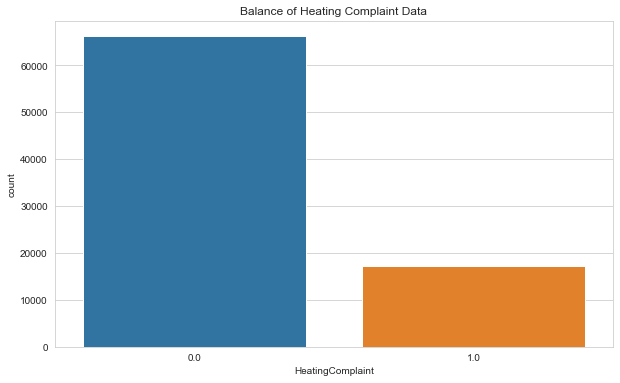

In [105]:
plt.figure(figsize=(10,6))

sns.countplot(x='HeatingComplaint', data = df311_final)
plt.title('Balance of Heating Complaint Data')

In [106]:
df311_final.corr()['HeatingComplaint'].sort_values()

BC1                -0.131651
YearBuilt          -0.110221
BC2                -0.069538
LT5                -0.065658
LU5                -0.061455
LU10               -0.058020
LU6                -0.056496
LU8                -0.026188
LT2                -0.024566
LU9                -0.020975
LU7                -0.019629
FactryArea         -0.018465
NumBldgs           -0.016784
StrgeArea          -0.012373
CommFAR            -0.009772
LT6                -0.006519
LT8                -0.005299
LT1                -0.004159
BC4                -0.003167
LotArea            -0.002782
BC3                -0.002569
GarageArea         -0.001786
LU11               -0.001766
ComArea            -0.000743
OtherArea           0.000555
LotDepth            0.000677
LT4                 0.001215
LT7                 0.001284
LT9                 0.003546
AssessLand          0.004875
OfficeArea          0.006843
RetailArea          0.008347
AssessTot           0.025084
LT3                 0.074225
LotFront      

Text(0.5, 1, 'Correlation of Datapoints')

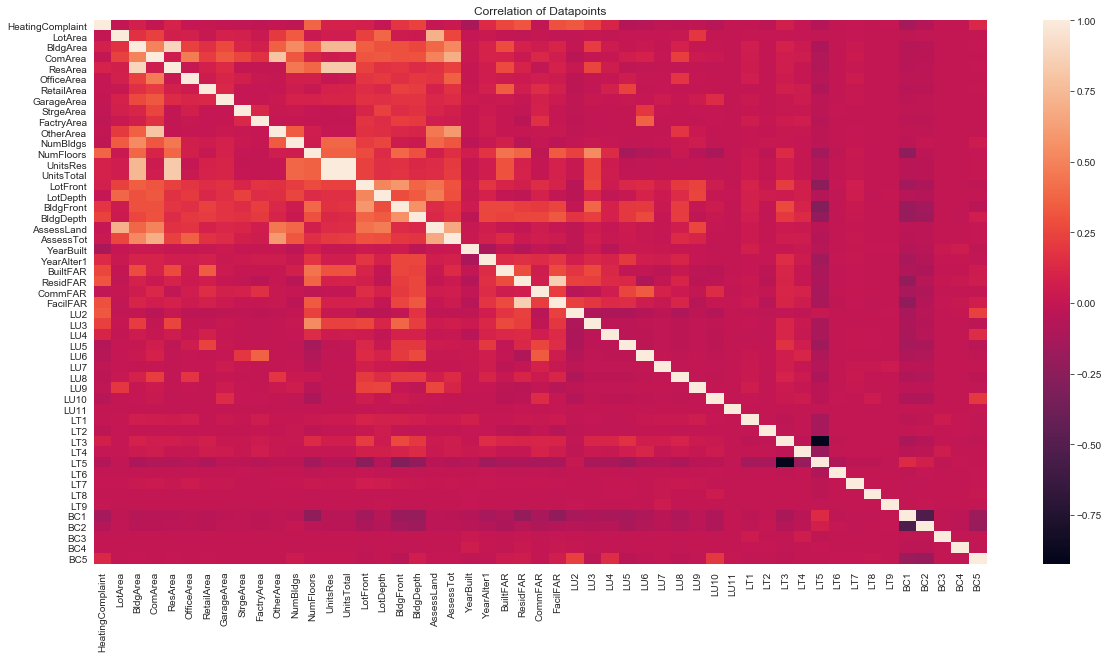

In [107]:
plt.figure(figsize=(20,10))

sns.heatmap(df311_final.corr(),annot=False)
plt.title('Correlation of Datapoints')

Text(0.5, 1.0, 'Distribution of Correlations')

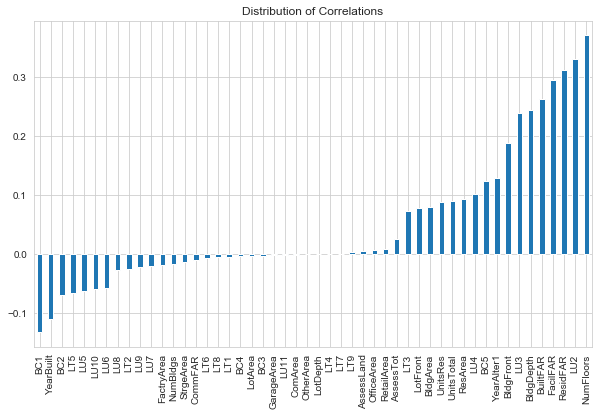

In [108]:
plt.figure(figsize=(10,6))
df311_final.corr()['HeatingComplaint'].sort_values().drop('HeatingComplaint').plot(kind='bar')
plt.title('Distribution of Correlations')

Text(0.5, 1.0, 'Count of Complaints versus Amount of Floors')

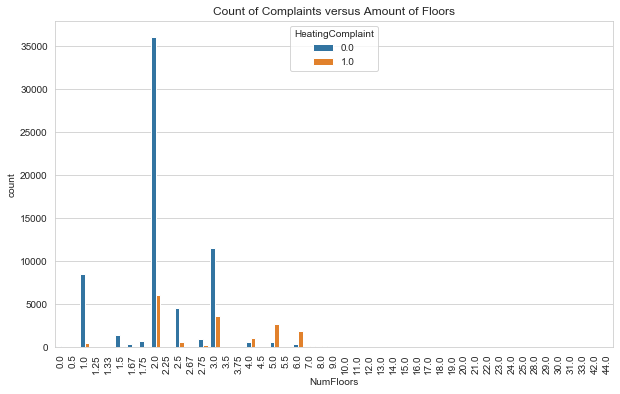

In [109]:
plt.figure(figsize=(10,6))

sns.countplot(x='NumFloors',data=df311_final,hue='HeatingComplaint')
plt.xticks(rotation=90)
plt.title('Count of Complaints versus Amount of Floors')

Text(0.5, 1.0, 'Count of Complaints versus Year Built')

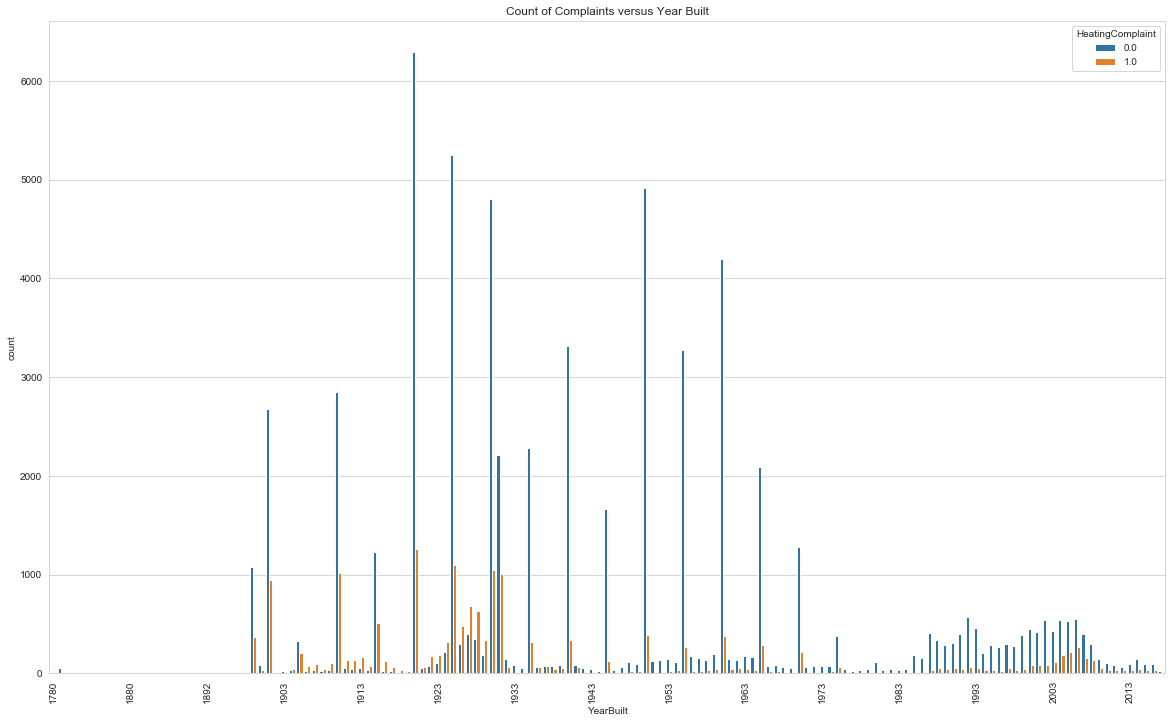

In [110]:
fig = plt.figure(figsize=(20,12))

plot_ = sns.countplot(x='YearBuilt',data=df311_final,hue='HeatingComplaint')

new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
plt.xticks(rotation=90)
plt.title('Count of Complaints versus Year Built')

Text(0.5, 1.0, 'Count of Complaints versus Year of Alterations')

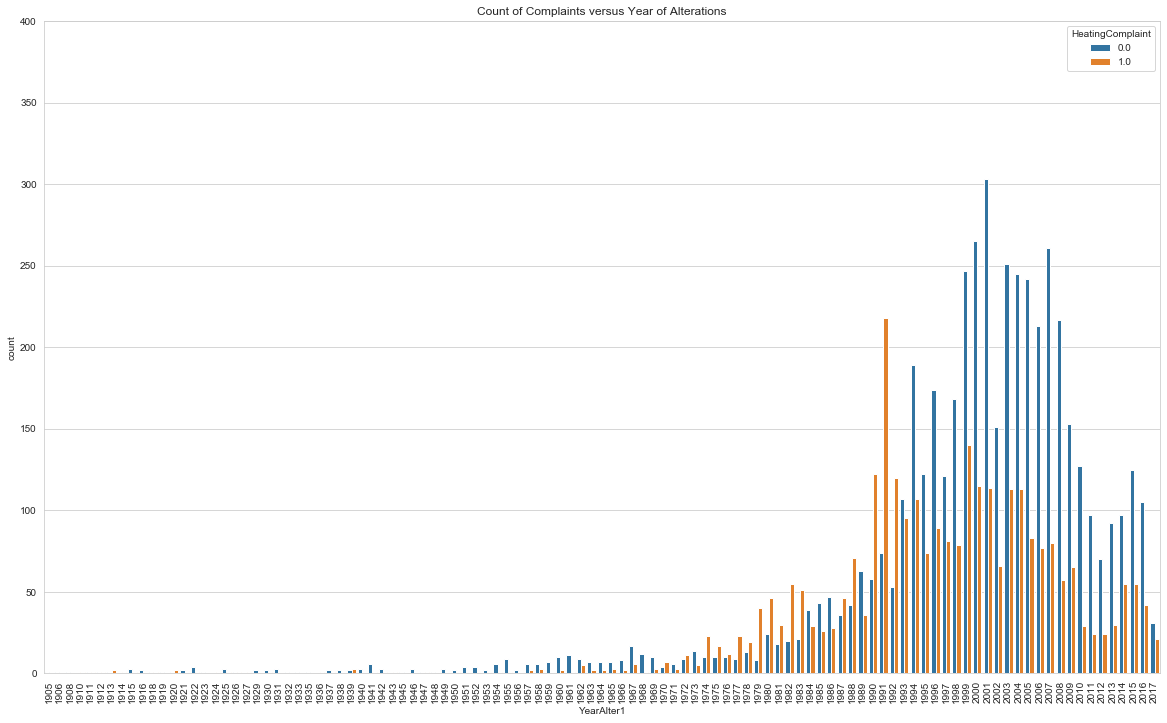

In [111]:
plt.figure(figsize=(20,12))

sns.countplot(x='YearAlter1',data=df311_final[df311_final['YearAlter1']!=0],hue='HeatingComplaint')
plt.xticks(rotation=90)
plt.ylim(0,400)
plt.title('Count of Complaints versus Year of Alterations')

# Conclusions

The top results for impact on whether a location will have heating complainats are:
- Number of floors
- Having renovations completed
- Residential area 
- Total units
- Area of the building
- If it is on a corner 
- The total cost of the building

These all make sense, as they are an indicator of the amount of tennants that would be in the building. The greater the amount of tennants, the greater the chance is that someone will have an issue at some point. 

In [114]:
# Normal data analysis packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [112]:
df311_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83487 entries, 0 to 89852
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeatingComplaint  83487 non-null  float64
 1   LotArea           83487 non-null  int64  
 2   BldgArea          83487 non-null  int64  
 3   ComArea           83487 non-null  int64  
 4   ResArea           83487 non-null  int64  
 5   OfficeArea        83487 non-null  int64  
 6   RetailArea        83487 non-null  int64  
 7   GarageArea        83487 non-null  int64  
 8   StrgeArea         83487 non-null  int64  
 9   FactryArea        83487 non-null  int64  
 10  OtherArea         83487 non-null  int64  
 11  NumBldgs          83487 non-null  int64  
 12  NumFloors         83487 non-null  float64
 13  UnitsRes          83487 non-null  int64  
 14  UnitsTotal        83487 non-null  int64  
 15  LotFront          83487 non-null  float64
 16  LotDepth          83487 non-null  float6

In [129]:
X = df311_final.drop('HeatingComplaint',axis=1)
y = df311_final['HeatingComplaint']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [130]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
complaint_logmodel = LogisticRegression(max_iter=500)
complaint_logmodel.fit(X_train,y_train)

predictions = complaint_logmodel.predict(X_test)

In [137]:
y_train.mean()

0.2065366187542779

In [147]:
print('Score: {}'.format(complaint_logmodel.score(X_train,y_train)))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Score: 0.8503251197809719
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     19866
         1.0       0.73      0.42      0.53      5181

    accuracy                           0.85     25047
   macro avg       0.80      0.69      0.72     25047
weighted avg       0.84      0.85      0.83     25047

[[19081   785]
 [ 3008  2173]]


In [124]:
X = df311_final.drop('HeatingComplaint',axis=1).values
y = df311_final['HeatingComplaint'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
model = Sequential()

# input layer
model.add(Dense(31,activation='relu'))
model.add(Dropout(0.2))

# hidden layer 1
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))

#Binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [126]:
model.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_test,y_test))

Train on 58440 samples, validate on 25047 samples
Epoch 1/25
58440/58440 [==============================] - 12s 211us/sample - loss: 0.4168 - val_loss: 0.3909
Epoch 2/25
58440/58440 [==============================] - 11s 185us/sample - loss: 0.3926 - val_loss: 0.3829
Epoch 3/25
58440/58440 [==============================] - 10s 172us/sample - loss: 0.3889 - val_loss: 0.3800
Epoch 4/25
58440/58440 [==============================] - 9s 160us/sample - loss: 0.3856 - val_loss: 0.3774
Epoch 5/25
58440/58440 [==============================] - 9s 155us/sample - loss: 0.3841 - val_loss: 0.3782
Epoch 6/25
58440/58440 [==============================] - 11s 184us/sample - loss: 0.3809 - val_loss: 0.3804
Epoch 7/25
58440/58440 [==============================] - 10s 166us/sample - loss: 0.3811 - val_loss: 0.3759
Epoch 8/25
58440/58440 [==============================] - 10s 172us/sample - loss: 0.3790 - val_loss: 0.3758
Epoch 9/25
58440/58440 [==============================] - 12s 210us/sample - los

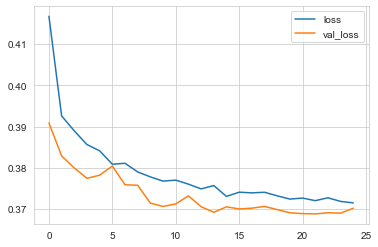

In [127]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [128]:
predictions = model.predict_classes(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91     19866
         1.0       0.76      0.43      0.55      5181

    accuracy                           0.85     25047
   macro avg       0.82      0.70      0.73     25047
weighted avg       0.85      0.85      0.84     25047

[[19184   682]
 [ 2962  2219]]
